In [35]:
from pandas import read_csv, Grouper, DataFrame, concat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import acf, pacf
import warnings

In [4]:
us_gdp_data = pd.read_csv('./data/GDPUS.csv', header=0)

In [5]:
date_rng = pd.date_range(start='1/1/1929', end='31/12/1991',freq='A')
print(date_rng)
us_gdp_data['TimeIndex'] = pd.DataFrame(date_rng,columns=['Year'])

DatetimeIndex(['1929-12-31', '1930-12-31', '1931-12-31', '1932-12-31',
               '1933-12-31', '1934-12-31', '1935-12-31', '1936-12-31',
               '1937-12-31', '1938-12-31', '1939-12-31', '1940-12-31',
               '1941-12-31', '1942-12-31', '1943-12-31', '1944-12-31',
               '1945-12-31', '1946-12-31', '1947-12-31', '1948-12-31',
               '1949-12-31', '1950-12-31', '1951-12-31', '1952-12-31',
               '1953-12-31', '1954-12-31', '1955-12-31', '1956-12-31',
               '1957-12-31', '1958-12-31', '1959-12-31', '1960-12-31',
               '1961-12-31', '1962-12-31', '1963-12-31', '1964-12-31',
               '1965-12-31', '1966-12-31', '1967-12-31', '1968-12-31',
               '1969-12-31', '1970-12-31', '1971-12-31', '1972-12-31',
               '1973-12-31', '1974-12-31', '1975-12-31', '1976-12-31',
               '1977-12-31', '1978-12-31', '1979-12-31', '1980-12-31',
               '1981-12-31', '1982-12-31', '1983-12-31', '1984-12-31',
      

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


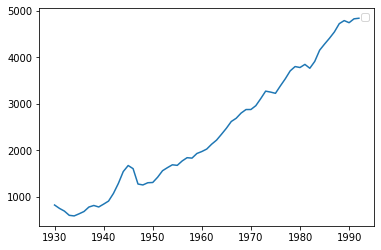

In [6]:
plt.plot(us_gdp_data.TimeIndex, us_gdp_data.GDP)
plt.legend(loc='best')
plt.show()

In [8]:
mvg_avg_us_gdp = us_gdp_data.copy()
#calculating the rolling mean - with window 5
mvg_avg_us_gdp['moving_avg_forecast'] = us_gdp_data['GDP'].rolling(5).mean()

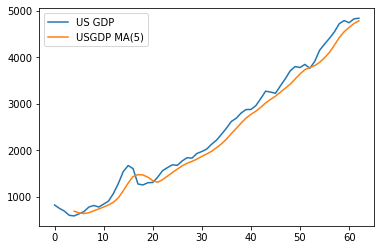

In [9]:
plt.plot(us_gdp_data['GDP'], label='US GDP')
plt.plot(mvg_avg_us_gdp['moving_avg_forecast'], label='USGDP MA(5)')
plt.legend(loc='best')
plt.show()

<AxesSubplot:>

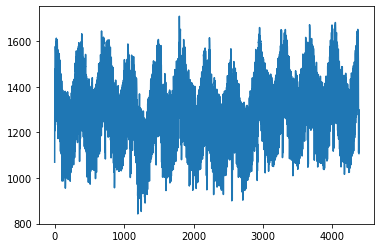

In [11]:
url='opsd_germany_daily.csv'
data = pd.read_csv(url,sep=",")
data['Consumption'].plot()

In [12]:
data_stationarity_test = adfuller(data['Consumption'],autolag='AIC')
print("P-value: ", data_stationarity_test[1])

P-value:  4.7440549018424435e-08


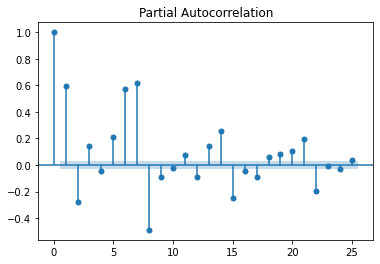

In [13]:
pacf = plot_pacf(data['Consumption'], lags=25)

In [14]:
train_df = data['Consumption'][:len(data)-100]
test_df = data['Consumption'][len(data)-100:]

In [15]:
model_ar = AutoReg(train_df, lags=8).fit()

C:\Users\vadi_\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [17]:
print(model_ar.summary())

                            AutoReg Model Results                             
Dep. Variable:            Consumption   No. Observations:                 4283
Model:                     AutoReg(8)   Log Likelihood              -24231.812
Method:               Conditional MLE   S.D. of innovations             70.058
Date:                Tue, 21 Mar 2023   AIC                              8.503
Time:                        19:53:05   BIC                              8.518
Sample:                             8   HQIC                             8.509
                                 4283                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept        121.2792     14.444      8.397      0.000      92.969     149.589
Consumption.L1     0.6393      0.013     47.751      0.000       0.613       0.666
Consumption.L2    -0.0966      0.011

In [18]:
predictions = model_ar.predict(start=len(train_df),
end=(len(data)-1), dynamic=False)

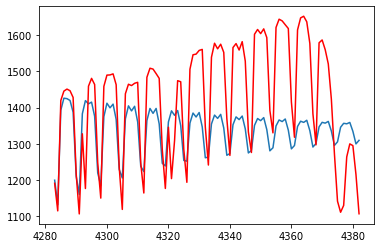

In [19]:
from matplotlib import pyplot
pyplot.plot(predictions)
pyplot.plot(test_df, color='red')

In [21]:
btc_data = pd.read_csv("btc.csv")
print(btc_data.head())

         Date       BTC-USD
0  2017-12-31  14156.400391
1  2018-01-01  13657.200195
2  2018-01-02  14982.099609
3  2018-01-03  15201.000000
4  2018-01-04  15599.200195


In [22]:
btc_data.index = pd.to_datetime(btc_data['Date'],
format='%Y-%m-%d')
del btc_data['Date']

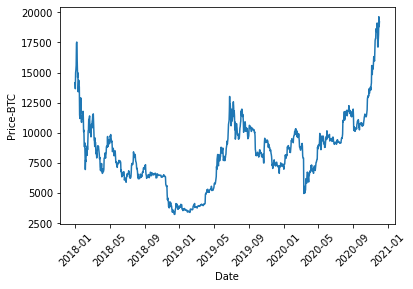

In [23]:
plt.ylabel('Price-BTC')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(btc_data.index, btc_data['BTC-USD'], )

In [25]:
train_data = btc_data[btc_data.index < pd.to_datetime("2020-11-01", format='%Y-%m-%d')]
test_data = btc_data[btc_data.index > pd.to_datetime("2020-11-01", format='%Y-%m-%d')]
print(train_data.shape)
print(test_data.shape)

(1036, 1)
(31, 1)


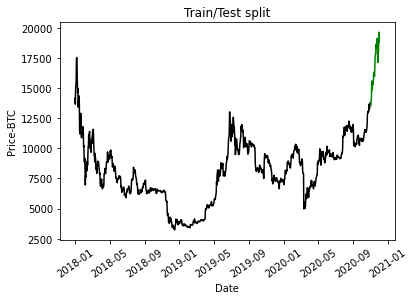

In [26]:
plt.plot(train_data, color = "black", label = 'Train')
plt.plot(test_data, color = "green", label = 'Test')
plt.ylabel('Price-BTC')
plt.xlabel('Date')
plt.xticks(rotation=35)
plt.title("Train/Test split")
plt.show()

In [27]:
actuals = train_data['BTC-USD']

In [28]:
ARMA_model = ARIMA(actuals, order = (1, 0, 1))
ARMA_model = ARMA_model.fit()

C:\Users\vadi_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\vadi_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\vadi_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [29]:
predictions = ARMA_model.get_forecast(len(test_data.index))
predictions_df = predictions.conf_int(alpha = 0.05)
predictions_df["Predictions"] = ARMA_model.predict(start = predictions_df.index[0], end = predictions_df.index[-1])
predictions_df.index = test_data.index
predictions_arma = predictions_df["Predictions"]

C:\Users\vadi_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


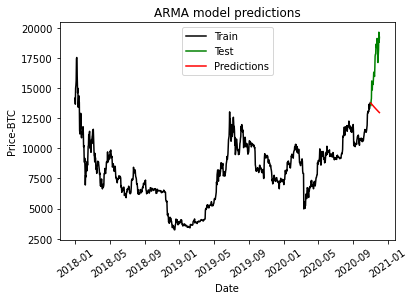

In [30]:
plt.plot(train_data, color = "black", label = 'Train')
plt.plot(test_data, color = "green", label = 'Test')
plt.ylabel('Price-BTC')
plt.xlabel('Date')
plt.xticks(rotation=35)
plt.title("ARMA model predictions")
plt.plot(predictions_arma, color="red", label = 'Predictions')
plt.legend()
plt.show()

In [31]:
rmse_arma = np.sqrt(mean_squared_error(test_data["BTC-USD"].values, predictions_df["Predictions"]))
print("RMSE: ",rmse_arma)

RMSE:  4017.145069637629


In [32]:
# differencing
ts_diff = actuals - actuals.shift(periods=4)
ts_diff.dropna(inplace=True)

In [33]:
# checking for stationarity
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts_diff)
pval = result[1]
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -6.124168
p-value: 0.000000


In [36]:
from statsmodels.tsa.stattools import adfuller
lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')

C:\Users\vadi_\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'Autocorrelation Function')

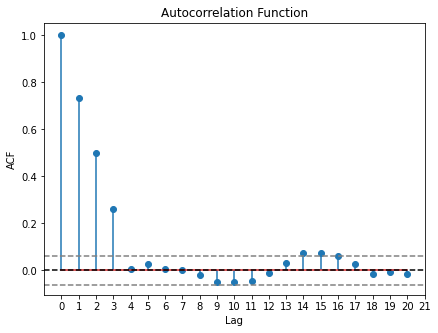

In [37]:
#Ploting ACF:
plt.figure(figsize = (15,5))
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y = 0, linestyle='--',color='black')
plt.axhline(y = -1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y = 1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.xticks(range(0,22,1))
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')

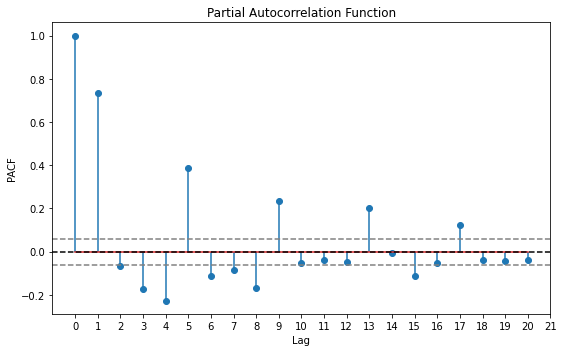

In [39]:
#Plotting PACF:
plt.figure(figsize = (15,5))
plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'black')
plt.axhline(y =-1.96/np.sqrt(len(actuals)), linestyle = '--',color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(actuals)),linestyle = '--',color = 'gray')
plt.xlabel('Lag')
plt.xticks(range(0,22,1))
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

In [40]:
ARIMA_model = ARIMA(actuals, order = (10, 4, 1))
ARIMA_model = ARIMA_model.fit()

C:\Users\vadi_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\vadi_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\vadi_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\vadi_\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\vadi_\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: Use

In [41]:
predictions = ARIMA_model.get_forecast(len(test_data.index))
predictions_df = predictions.conf_int(alpha = 0.05)
predictions_df["Predictions"] = ARIMA_model.predict(start =
predictions_df.index[0], end = predictions_df.index[-1])
predictions_df.index = test_data.index
predictions_arima = predictions_df["Predictions"]


C:\Users\vadi_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


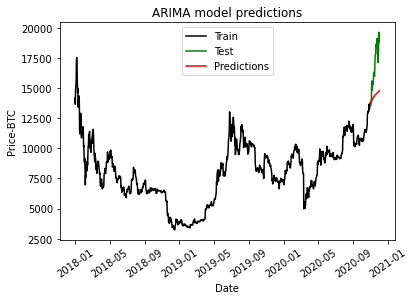

In [42]:
plt.plot(train_data, color = "black", label = 'Train')
plt.plot(test_data, color = "green", label = 'Test')
plt.ylabel('Price-BTC')
plt.xlabel('Date')
plt.xticks(rotation=35)
plt.title("ARIMA model predictions")
plt.plot(predictions_arima, color="red", label = 'Predictions')
plt.legend()
plt.show()

In [43]:
rmse_arima = np.sqrt(mean_squared_error(test_data["BTC-USD"].
values, predictions_df["Predictions"]))
print("RMSE: ",rmse_arima)

RMSE:  2895.312718157126


In [60]:
def arima_model_evaluate(train_actuals, test_data, order):
    # Model initalize and fit
    ARIMA_model = ARIMA(actuals, order = order)
    ARIMA_model = ARIMA_model.fit()
    # Getting the predictions
    predictions = ARIMA_model.get_forecast(len(test_data.index))
    predictions_df = predictions.conf_int(alpha = 0.05)
    predictions_df["Predictions"] = ARIMA_model.predict(start = predictions_df.index[0], end = predictions_df.index[-1])
    predictions_df.index = test_data.index
    predictions_arima = predictions_df["Predictions"]
    # calculate RMSE score
    rmse_score = np.sqrt(mean_squared_error(test_data["BTC-USD"].values, predictions_df["Predictions"]))
    return rmse_score

In [61]:
def evaluate_models(train_actuals, test_data, list_p_values,
    list_d_values, list_q_values):
    best_rmse, best_config = float("inf"), None
    for p in list_p_values:
        for d in list_d_values:
            for q in list_q_values:
                arima_order = (p,d,q)
                rmse = arima_model_evaluate(train_actuals,test_data, arima_order)
                if rmse < best_rmse:
                    best_rmse, best_config = rmse, arima_order
                print('ARIMA%s RMSE=%.3f' % (arima_order,rmse))
    print('Best Configuration: ARIMA%s , RMSE=%.3f' % (best_config, best_rmse))
    return best_config

In [62]:
p_values = range(0, 4)
d_values = range(0, 4)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
best_config = evaluate_models(actuals,test_data, p_values,d_values, q_values)

ARIMA(0, 0, 0) RMSE=8973.268
ARIMA(0, 0, 1) RMSE=8927.094
ARIMA(0, 0, 2) RMSE=8895.924
ARIMA(0, 0, 3) RMSE=8861.499
ARIMA(0, 1, 0) RMSE=3527.133
ARIMA(0, 1, 1) RMSE=3537.297
ARIMA(0, 1, 2) RMSE=3519.475
ARIMA(0, 1, 3) RMSE=3514.476
ARIMA(0, 2, 0) RMSE=1112.565
ARIMA(0, 2, 1) RMSE=3455.709
ARIMA(0, 2, 2) RMSE=3315.249
ARIMA(0, 2, 3) RMSE=3337.231
ARIMA(0, 3, 0) RMSE=30160.941
ARIMA(0, 3, 1) RMSE=887.423
ARIMA(0, 3, 2) RMSE=3209.141
ARIMA(0, 3, 3) RMSE=2970.229
ARIMA(1, 0, 0) RMSE=4079.516
ARIMA(1, 0, 1) RMSE=4017.145
ARIMA(1, 0, 2) RMSE=4065.809
ARIMA(1, 0, 3) RMSE=4087.934
ARIMA(1, 1, 0) RMSE=3537.539
ARIMA(1, 1, 1) RMSE=3535.791
ARIMA(1, 1, 2) RMSE=3537.341
ARIMA(1, 1, 3) RMSE=3504.703
ARIMA(1, 2, 0) RMSE=725.218
ARIMA(1, 2, 1) RMSE=3318.935
ARIMA(1, 2, 2) RMSE=3507.106
ARIMA(1, 2, 3) RMSE=3314.726
ARIMA(1, 3, 0) RMSE=12360.360
ARIMA(1, 3, 1) RMSE=727.351
ARIMA(1, 3, 2) RMSE=2968.820
ARIMA(1, 3, 3) RMSE=3019.434
ARIMA(2, 0, 0) RMSE=4014.318
ARIMA(2, 0, 1) RMSE=4022.540
ARIMA(2, 0, 2) 

In [63]:
ARIMA_model = ARIMA(actuals, order = best_config)
ARIMA_model = ARIMA_model.fit()

In [64]:
predictions = ARIMA_model.get_forecast(len(test_data.index))
predictions_df = predictions.conf_int(alpha = 0.05)
predictions_df["Predictions"] = ARIMA_model.predict(start =
predictions_df.index[0], end = predictions_df.index[-1])
predictions_df.index = test_data.index
predictions_arima = predictions_df["Predictions"]

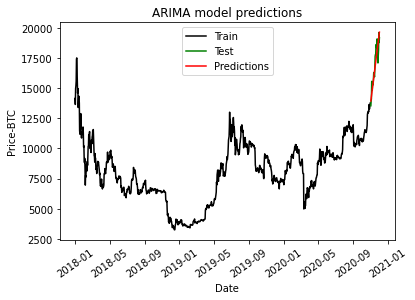

In [65]:
plt.plot(train_data, color = "black", label = 'Train')
plt.plot(test_data, color = "green", label = 'Test')
plt.ylabel('Price-BTC')
plt.xlabel('Date')
plt.xticks(rotation=35)
plt.title("ARIMA model predictions")
plt.plot(predictions_arima, color="red", label = 'Predictions')
plt.legend()
plt.show()

In [66]:
rmse_arima = np.sqrt(mean_squared_error(test_data["BTC-USD"].
values, predictions_df["Predictions"]))
print("RMSE: ",rmse_arima)

RMSE:  725.2180143501593


In [67]:
SARIMA_model = SARIMAX(actuals, order = (1, 2, 0), seasonal_order=(2,2,2,12))
SARIMA_model = SARIMA_model.fit()

In [68]:
predictions = SARIMA_model.get_forecast(len(test_data.index))
predictions_df = predictions.conf_int(alpha = 0.05)
predictions_df["Predictions"] = SARIMA_model.predict(start =predictions_df.index[0], end = predictions_df.index[-1])
predictions_df.index = test_data.index
predictions_sarima = predictions_df["Predictions"]

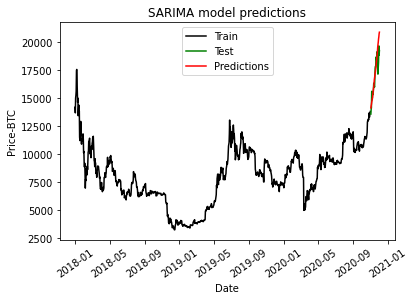

In [69]:
plt.plot(train_data, color = "black", label = 'Train')
plt.plot(test_data, color = "green", label = 'Test')
plt.ylabel('Price-BTC')
plt.xlabel('Date')
plt.xticks(rotation=35)
plt.title("SARIMA model predictions")
plt.plot(predictions_sarima, color="red", label ='Predictions')
plt.legend()
plt.show()

In [70]:
rmse_sarima = np.sqrt(mean_squared_error(test_data["BTC-USD"].values, predictions_df["Predictions"]))
print("RMSE: ",rmse_sarima)

RMSE:  1050.157033576061


In [71]:
SES_model = SimpleExpSmoothing(actuals)
SES_model = SES_model.fit(smoothing_level=0.8,optimized=False)

In [72]:
predictions_ses = SES_model.forecast(len(test_data.index))

In [73]:
plt.plot(train_data, color = "black", label = 'Train')
plt.plot(test_data, color = "green", label = 'Test')
plt.ylabel('Price-BTC')
plt.xlabel('Date')
plt.xticks(rotation=35)
plt.title("SImple Exponential Smoothing (SES) model
predictions")
plt.plot(predictions_ses, color='red', label = 'Predictions')
plt.legend()
plt.show()

SyntaxError: EOL while scanning string literal (Temp/ipykernel_30928/3180726283.py, line 6)

In [ ]:
rmse_ses = np.sqrt(mean_squared_error(test_data["BTC-USD"].
values, predictions_ses))
print("RMSE: ",rmse_ses)

In [ ]:
HW_model = ExponentialSmoothing(actuals, trend='add')
HW_model = HW_model.fit()

In [ ]:
predictions_hw = HW_model.forecast(len(test_data.index))


In [ ]:
plt.plot(train_data, color = "black", label = 'Train')
plt.plot(test_data, color = "green", label = 'Test')
plt.ylabel('Price-BTC')
plt.xlabel('Date')
plt.xticks(rotation=35)
plt.title("HW model predictions")
plt.plot(predictions_hw, color='red', label = 'Predictions')
plt.legend()
plt.show()

In [ ]:
rmse_hw = np.sqrt(mean_squared_error(test_data["BTC-USD"].
values, predictions_hw))
print("RMSE: ",rmse_hw)